In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os , cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers , regularizers
from keras import layers , models
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
train_dir = "C:/Users/HAPPY/Desktop/Aerial/train/train"
test_dir = "C:/Users/HAPPY/Desktop/Aerial/test/test"
train  = pd.read_csv('C:/Users/HAPPY/Desktop/Aerial/train.csv')

df_test = pd.read_csv('C:/Users/HAPPY/Desktop/Aerial/sample_submission.csv')

In [3]:
train.has_cactus = train.has_cactus.astype(str)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 2 columns):
id            17500 non-null object
has_cactus    17500 non-null object
dtypes: object(2)
memory usage: 273.5+ KB


In [ ]:
train.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


Text(0.5, 1.0, 'Distribution of the train set')

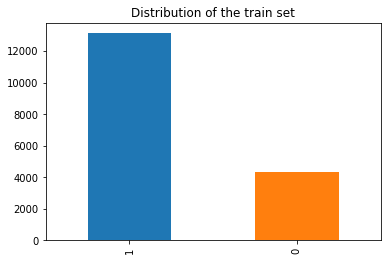

In [ ]:
train['has_cactus'].value_counts().plot.bar()
plt.title('Distribution of the train set')

In [ ]:
df_test.shape[0]

4000

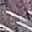

In [ ]:
Image(filename = os.path.join( 'C:\\Users\\HAPPY\\Desktop\\Aerial\\train\\train' ,  train.iloc[1,0]),width = 250 ,height =250)

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255,validation_split = .20)
batch_size = 150

In [ ]:
train_generator=datagen.flow_from_dataframe(dataframe=train,directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(100,100))




Found 17500 images belonging to 2 classes.


In [ ]:
validation_generator=datagen.flow_from_dataframe(dataframe=train,directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(100,100))

Found 17500 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3),activation = 'relu' , input_shape = (100 , 100 ,3)))
model.add(layers.MaxPool2D((2 , 2)))
model.add(layers.Conv2D(64 , (3,3),activation = 'relu' , input_shape = (100 , 100 ,3)))
model.add(layers.MaxPool2D((2 , 2)))
model.add(layers.Conv2D(128 , (3,3),activation = 'relu' , input_shape = (100 , 100 ,3)))
model.add(layers.MaxPool2D((2 , 2)))
model.add(layers.Conv2D(128 , (3,3),activation = 'relu' , input_shape = (100 , 100 ,3)))
model.add(layers.MaxPool2D((2 , 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256 , activation = 'relu'))
model.add(layers.Dense(1 , activation = 'sigmoid'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
__________

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = optimizers.rmsprop() , metrics = ['accuracy'])

In [ ]:
epochs = 10
history = model.fit_generator(train_generator,steps_per_epoch = 150,epochs =5,validation_data = validation_generator , validation_steps =50)

Epoch 1/5
  5/150 [>.............................] - ETA: 2:00:58 - loss: 0.7243 - acc: 0.6480

In [ ]:
y_pre=model.predict_proba(test_features)

In [ ]:
df=pd.DataFrame({'id':df_test['id'] })
df['has_cactus']=y_pre
df.to_csv("submission.csv",index=False)